In [1]:
import cv2 as cv
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys
import numpy as np
import re

from ipywidgets import interactive, widgets, Layout
import skimage
from PIL import Image
from imutils.paths import list_images
%matplotlib inline 

In [2]:
sys.path.append("/home/eccoope/pv-vision/")
from pv_vision.transform_crop.solarmodule import MaskModule

In [3]:
path = '/projects/wg-psel-ml/EL_images/eccoope/raw_images'
images = [cv.imread(file, flags=cv.IMREAD_UNCHANGED) for file in list_images(path)]
files = [re.findall(path + r'/(.*)\.(...)',
                    file)[0][0] for file in list_images(path)]

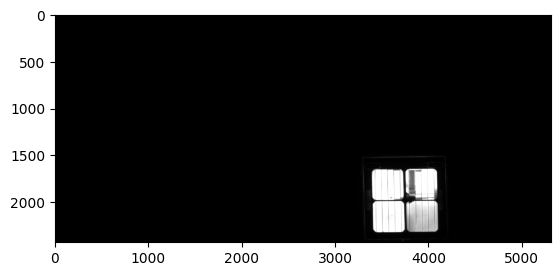

In [21]:
i = 2
img = images[i]
plt.imshow(img, 'gray')

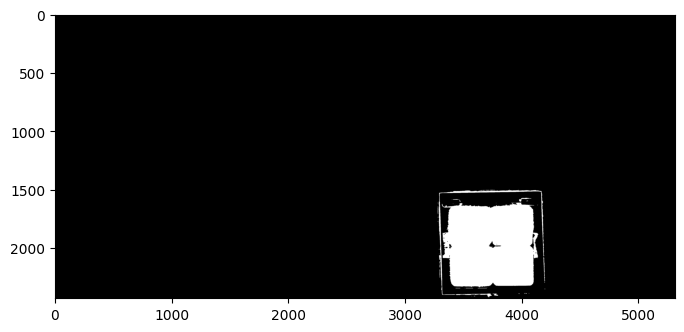

interactive(children=(FloatSlider(value=10.0, description='thre', max=200.0), Output()), _dom_classes=('widget…

In [24]:
## Load mask.
## Note that this is different from the transform_cnn 
## method where the mask is predicted by a cnn model.
## In this image, the background is not very complex, so
## we can use simpler computer vision method.

## we can use the slider to find the optimal threshold value

raw_module = MaskModule(img, 2, 2, 6)

def update_mask(thre):
    mask = raw_module.load_mask(thre=thre, output=True)
    plt.figure(figsize=(8, 6))
    plt.imshow(mask, "gray")

thre = widgets.FloatSlider(value=10, min=0, max=200, step=.1)
interactive(update_mask,
            thre=thre, description="Threshold")

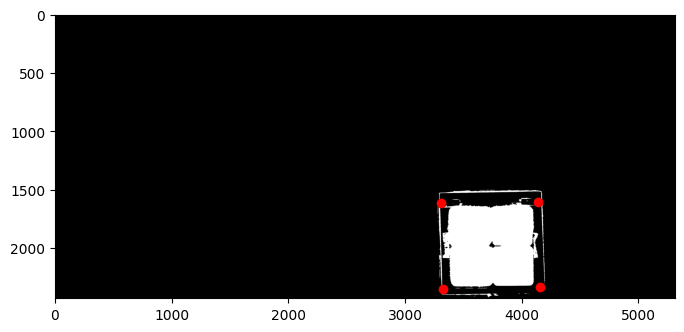

interactive(children=(IntSlider(value=4, description='mode', max=4), Output()), _dom_classes=('widget-interact…

In [25]:
# detect corners, different modes are provided
# For rounded rectangle module, mode 4 is recommended

def update_corner(mode):
    corners = raw_module.corner_detection_cont(output=True, mode=mode)
    x, y = zip(*corners)

    plt.figure(figsize=(8, 6))
    plt.imshow(raw_module.mask, 'gray')
    plt.scatter(x, y, c='r')

mode=widgets.IntSlider(value=4, min=0, max=4, step=1)
interactive(update_corner,
            mode=mode)

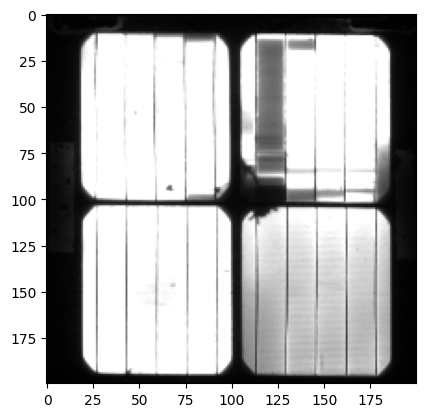

In [26]:
# transform modules
img_transformed = raw_module.transform(cellsize=100, img_only=True)
plt.imshow(img_transformed, 'gray')